# A project for analyzing the IPO market and decide which has a better performance

In [2]:
#First import the data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from patsy import dmatrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import linear_model 
%matplotlib inline
ipos = pd.read_csv(r'ipo_data_1.csv', encoding='latin-1') 
sp = pd.read_csv(r'GSPC.csv') 
sp.reset_index(drop=True, inplace=True) 

In [4]:
#Convert data from object to datetime
sp['Date'] = pd.to_datetime(sp['Date']) 
ipos['Date'] = pd.to_datetime(ipos['Date'])
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [5]:
#Theoretically that the performance of the market from last will play some impact to some specific stock, so calculate the changes
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2009-08-01
error 2013-11-16
error 2015-02-21
error 2015-02-21


In [9]:
#Check the reason of the reason and update to correct dates
error = ['2009-08-01','2013-11-16','2015-02-21']
ipos[ipos.Date.isin(error)]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1175,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.50,16.52,10.13,2.50,1.52,3,NaN,-0.98,-5.600000,NaN
1881,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.50,16.31,-1.15,2.00,-0.19,3,NaN,-2.19,-11.837838,NaN
2211,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,1,NaN,0.19,1.853659,NaN
2212,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,1,NaN,0.75,3.947368,NaN


In [11]:
ipos.loc[1175, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[1881, 'Date'] = pd.to_datetime('2013-11-06')
ipos.loc[2211, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[2212, 'Date'] = pd.to_datetime('2015-05-21')

In [12]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [13]:
ipos['SP Week Change']

0      -2.745286
1      -2.159051
2      -2.159051
3      -4.465785
4      -5.468547
5      -4.203722
6      -1.055120
7      -1.384096
8      -2.929317
9       1.365088
10      5.256244
11      5.803397
12      5.803397
13      5.110292
14      3.780551
15      4.234094
16     -0.667460
17     -3.504664
18     -4.181103
19     -4.181103
20     -1.090923
21     -1.090923
22     -3.149306
23     -2.866537
24     -4.133677
25     -1.733266
26     -4.524058
27     -3.305298
28     -0.189369
29     -0.189369
          ...   
2299   -0.741122
2300   -0.741122
2301   -0.741122
2302   -0.358727
2303   -0.358727
2304   -1.658160
2305   -1.329132
2306   -1.329132
2307   -1.329132
2308   -0.892420
2309   -6.122305
2310   -6.122305
2311    6.837620
2312    2.560664
2313    2.560664
2314   -1.101129
2315   -1.133345
2316   -1.133345
2317   -1.133345
2318   -1.133345
2319   -1.458292
2320    0.092517
2321    0.092517
2322    0.026056
2323    0.026056
2324    1.167225
2325    3.137319
2326    3.1373

In [14]:
#Find yesterday's data
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-2.745286,0.0
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,-2.159051,0.0
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,-2.159051,0.0
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-4.465785,0.0
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-5.468547,0.0


In [15]:
#Clean data
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

A.G. Edwards
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC World Markets
CIBC Worldwide
CRT Capital
CRT Capital Group
CS First Boston
CSFirst Boston
Canaccord Genuity
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China Inter'l
China International
Cit
Citi
Citigroup
Cohen
Cohen & Company Capital Markets, LLC   I-Bankers Securities
Cowen
Cowen and Company
Craig-Hallum Capital
Credit Suisse
Credit Suis

In [16]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'
ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'
ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'
ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'
ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'
ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'
ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'
ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'
ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'
ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'
ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'
ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'
ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'
ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'
ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'
ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'
ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'
ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'
ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'
ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'
ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'
ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'
ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'
ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'
ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'
ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'
ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'
ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'
ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'
ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'
ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'
ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'
ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [17]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Banc of America
Barclays
Bear Stearns
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
DA Davidson
Dawson James Securities
Deutsche Bank
EarlyBirdCapital
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
Friedman Billings Ramsey
Gilford Securities
Global Hunter Securities, LLC
Goldman Sachs
Gunn Allen
HCFP Brenner
I-Bankers
ING Barings
Imperial Capital
JMP Securities
JP Morgan
JP Turner
Janney Montgomery Scott
Jefferies
Johnson Rice
Keefe, Bruyette & Woods
KeyBanc Capital Markets
LG Investment & Securities
Ladenburg Thalmann
Laidlaw & Company (UK) Ltd.
Lazard Capital Markets
Leerink Partners
Legg

In [18]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [20]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-2.745286,0.0,Bear Stearns,1,Mon,Jan
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,-2.159051,0.0,Lehman Brothers,2,Fri,Feb
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,-2.159051,0.0,Salomon Smith Barney,2,Fri,Feb
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-4.465785,0.0,Lehman Brothers,1,Tues,Feb
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-5.468547,0.0,Jefferies,1,Thurs,Feb


In [21]:
# Close and Opening prices
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [22]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") + Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") + Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')
X.head()

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,16.094584,2.11,11.00,13.11,0.0,-2.745286
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.083264,0.01,12.00,12.01,0.0,-2.159051
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.821963,2.05,28.00,30.05,0.0,-2.159051
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.705882,1.00,20.25,21.25,0.0,-4.465785
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.432749,1.10,16.00,17.10,0.0,-5.468547


In [24]:
# Complete data cleaning section

In [27]:
# Since raw data from ipc is order by date and 2190 is the first records with year 2015, 
#so we will train data before 2015, and making predictions on 2015
idx = 2190
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= 1 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= 1 else 0)

In [28]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
#Here is our performance of LogisticRegression
clf.score(X_test, y_test)

0.8345323741007195

In [30]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    141.000000
mean       0.151702
std        2.603392
min       -6.160000
25%       -0.720000
50%        0.000000
75%        0.660000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [31]:
pred_label = clf.predict(X_test)

results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf.head()

,index,$ chg,predicted,actual,correct
0,2190,-2.67,0,0,1
1,2191,2.74,0,1,0
2,2192,-4.05,0,0,1
3,2193,-1.10,0,0,1
4,2194,0.35,0,0,1


In [32]:
rf[rf['predicted']==1]['$ chg'].describe()

count     7.000000
mean      3.587143
std       8.130766
min      -2.320000
25%      -1.235000
50%      -0.720000
75%       5.290000
max      20.040000
Name: $ chg, dtype: float64

In [33]:
# Buy in action decrease from 141 to 7, and the value increased from 0.15 to 3.58

Text(0.5, 0, 'Index')

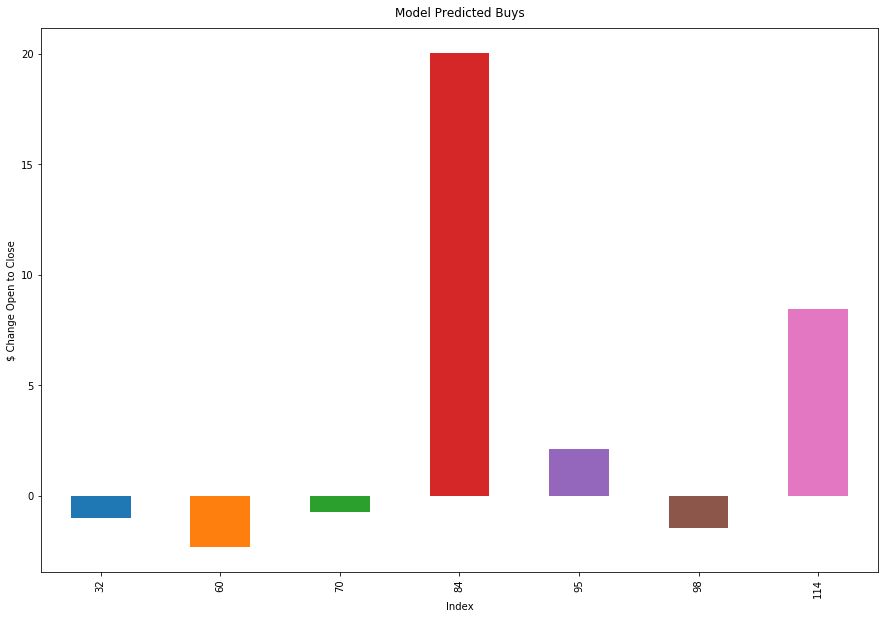

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [35]:
#change the gap from 1 to 0.25
idx = 2190
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5971223021582733

In [36]:
#The accuracy is 59%
pred_label = clf.predict(X_test)

results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    20.000000
mean      1.658500
std       5.847896
min      -6.160000
25%      -1.417500
50%       0.095000
75%       2.112500
max      20.040000
Name: $ chg, dtype: float64

Text(0.5, 0, 'Index')

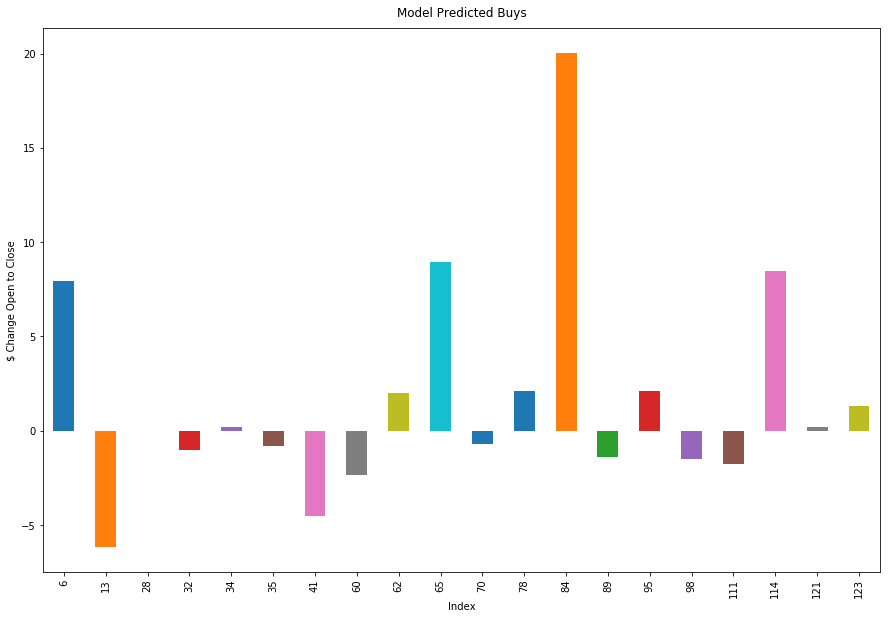

In [37]:
#Looks like there are profits still!
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')#looks like there is still profits

In [38]:
#Now used 2014 data as test data instead of train
idx = 1902
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6252927400468384

In [39]:
pred_label = clf.predict(X_test)

results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    68.000000
mean      0.791471
std       4.641188
min      -6.960000
25%      -1.660000
50%      -0.190000
75%       2.320000
max      20.040000
Name: $ chg, dtype: float64

In [40]:
#Now check out the feature importance
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.046174,"Q(""Lead Mgr"")[T.C.E. Unterberg, Towbin]"
1,1.012156,"Q(""Lead Mgr"")[T.Morgan Keegan]"
2,0.994768,"Q(""Lead Mgr"")[T.Wachovia]"
3,0.795503,"Q(""Lead Mgr"")[T.China International]"
4,0.679173,"Q(""Lead Mgr"")[T.Merrill Lynch]"
5,0.672118,"Q(""Lead Mgr"")[T.Burnham Securities]"
6,0.644796,"Q(""Lead Mgr"")[T.Anderson & Strudrick]"
7,0.628325,"Q(""Lead Mgr"")[T.Aegis Capital]"
8,0.574775,"Q(""Lead Mgr"")[T.Oppenheimer]"
9,0.570213,"Q(""Lead Mgr"")[T.FIG Partners]"


In [41]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.087431,"Q(""Week Day"")[T.Mon]"
13,0.092530,"Q(""Week Day"")[T.Thurs]"
14,-0.021513,"Q(""Week Day"")[T.Tues]"
15,-0.027210,"Q(""Week Day"")[T.Wed]"


In [42]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
33,2002-05-21,Computer Programs and Systems,CPSI,Morgan Keegan/Raymond James,16.5,17.50,18.12,9.82,1.00,1.62,...,0.62,3.542857,2.480647,0.000000,Morgan Keegan,2,Tues,May,5.714286,3.542857
518,2005-08-04,Advanced Life Sciences,ADLS,"C.E. Unterberg, Towbin/ThinkEquity Partners",5.0,5.03,6.00,20.00,0.03,1.00,...,0.97,19.284294,1.777992,0.000000,"C.E. Unterberg, Towbin",2,Thurs,Aug,0.596421,19.284294
884,2007-02-26,Rosetta Genomics,ROSG,"C.E. Unterberg, Towbin",7.0,7.02,7.32,4.57,0.02,0.32,...,0.30,4.273504,0.363086,-0.010330,"C.E. Unterberg, Towbin",1,Mon,Feb,0.284900,4.273504
1467,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,-0.25,0.00,...,0.25,1.694915,-3.693126,-0.003091,Morgan Keegan,1,Wed,Jun,-1.694915,1.694915


([<matplotlib.axis.XTick at 0x1bb9d66dcc0>,
 <a list of 20 Text xticklabel objects>)

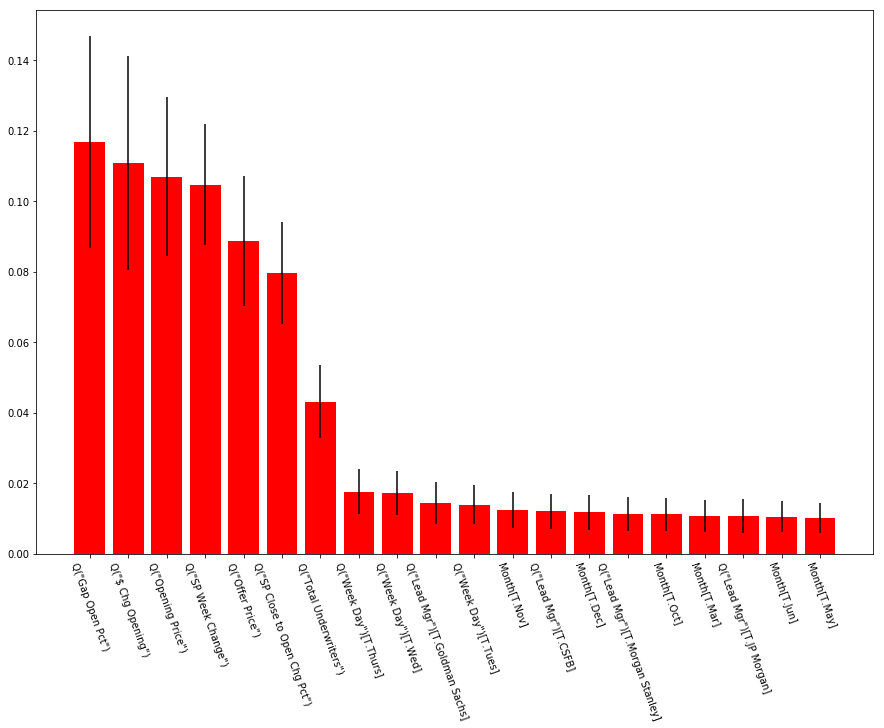

In [43]:
#Use random forest considering the features
clf_rf = RandomForestClassifier(n_estimators=5000)
model = clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70)